In [18]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, vstack
from clevar.catalog import ClCatalog
from numpy.ma import masked
import sys
from clevar.match import output_matched_catalog

In [19]:
path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/mag_i/cut/'
c1 = ClCatalog.read(path+'c1_p_ls1438z115.fits', 'c1', full = True)
c2 = ClCatalog.read(path+'c2_p_ls1438z115.fits', 'c2', full = True)

In [3]:
c_merged_12 = ClCatalog.read(path+'output_catalog_' + 'p' + '_ls1438z115.fits', 'merged',  full=True)

/sps/lsst/users/namourou/conda_clone_210223/descv1.1/clevar/clevar/catalog.py:280: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [4]:
c_merged_12

id,cat1_id,cat1_ra,cat1_dec,cat1_z,cat1_mass,cat1_mt_self,cat1_mt_other,cat1_mt_multi_self,cat1_mt_multi_other,cat1_mt_cross,cat2_id,cat2_ra,cat2_dec,cat2_z,cat2_mass,cat2_z_true,cat2_log_mass,cat2_mt_self,cat2_mt_other,cat2_mt_multi_self,cat2_mt_multi_other,cat2_mt_cross,mt_self,mt_other,mt_multi_self,mt_multi_other
str4,bytes11,float64,float64,float32,float64,bytes5,bytes5,bytes14,bytes14,bytes5,bytes11,float64,float64,float32,float32,float32,float64,bytes6,bytes6,bytes20,bytes20,bytes6,object,object,object,object
0,1,50.113525,-40.03647,0.44,75.694496,416,416,416,416,416,416,50.0986812400157,-40.041193422095496,0.43517646,56.905266,0.4322221,1.7551524639129639,1,1,1,1,1,None,None,[],[]
1,2,50.642569,-41.402661,0.2,62.659902,449,449,449,449,449,449,50.642098246561304,-41.40092456771352,0.19257621,54.03733,0.19309519,1.7326939105987549,2,2,2,2,2,None,None,[],[]
2,3,50.421896,-39.587457,0.39,48.460455,1575,1575,1575,1575,1575,1575,50.42203362588924,-39.587746579168694,0.39265478,33.488884,0.38855246,1.5249006748199463,3,3,3,3,3,None,None,[],[]
3,4,50.603551,-39.582656,1.1,118.29114,79,79,79,79,79,79,50.601945314584675,-39.584667514262556,1.0827233,81.099655,1.0862333,1.9090189933776855,4,4,4,4,4,None,None,[],[]
4,5,50.577077,-40.162645,0.59,72.90131,471,471,471,471,471,471,50.57622204392435,-40.161587068873025,0.585211,60.45968,0.5825961,1.7814658880233765,5,5,5,5,5,None,None,[],[]
5,6,51.048368,-41.281951,0.79,79.642977,781,781,781,781,781,781,51.04846444718309,-41.26482347006931,0.7745975,41.63504,0.7753187,1.6194590330123901,6,6,6,6,6,None,None,[],[]
6,9,51.576131,-40.01887,0.61,55.388537,1704,1704,1704,1704,1704,1704,51.57638580775331,-40.02086515625286,0.58940583,34.724533,0.59494084,1.540636420249939,9,9,9,9,9,None,None,[],[]
7,11,50.48531,-40.23756,0.47,39.592532,2882,2882,2882,2882,2882,2882,50.48465228598305,-40.235853169827394,0.46735916,21.010313,0.47409478,1.322432518005371,11,11,11,11,11,None,None,[],[]
8,12,49.882404,-40.265199,0.89,59.43957,2201,2201,2201,2201,2201,2201,49.88170004866599,-40.266493288402934,0.8908192,28.6378,0.88413906,1.456939697265625,12,12,12,12,12,None,None,[],[]


In [5]:
c1_nm = []
c1_nm_mass = []
c1_nm_ra = []
c1_nm_dec = []
c1_nm_z = []
per = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
per_l = []
for i, id in enumerate(c1['id']):
    percent = round(i/len(c1['id']),2)
    if percent in per and percent not in per_l:
        print(round(i/len(c1['id']),2))
        per_l.append(percent)
    if id not in c_merged_12['cat2_mt_cross']:
        cdt = c1[c1['id']==id]
        c1_nm.append(id)
        c1_nm_mass.append(cdt['mass'])
        c1_nm_ra.append(cdt['ra'])
        c1_nm_dec.append(cdt['dec'])
        c1_nm_z.append(cdt['z'])
print('c1 ok')

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
c1 ok


In [6]:
c1_nm_massl = []
c1_nm_ral = []
c1_nm_decl = []
c1_nm_zl = []
for i in range(len(c1_nm_z)):
    c1_nm_massl.append(c1_nm_mass[i][0])
    c1_nm_ral.append(c1_nm_ra[i][0])
    c1_nm_decl.append(c1_nm_dec[i][0])
    c1_nm_zl.append(c1_nm_z[i][0])

In [7]:
c2_nm = []
c2_nm_mass = []
c2_nm_ra = []
c2_nm_dec = []
c2_nm_z = []
per = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]
per_l = []
for i, id in enumerate(c2['id']):
    percent = round(i/len(c2['id']),2)
    if percent in per and percent not in per_l:
        print(round(i/len(c2['id']),2))
        per_l.append(percent)
    if id not in c_merged_12['cat1_mt_cross']:
        cdt = c2[c2['id']==id]
        c2_nm.append(id)
        c2_nm_mass.append(cdt['mass'])
        c2_nm_ra.append(cdt['ra'])
        c2_nm_dec.append(cdt['dec'])
        c2_nm_z.append(cdt['z'])
print('c2 ok')

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
c2 ok


In [8]:
c2_nm_massl = []
c2_nm_ral = []
c2_nm_decl = []
c2_nm_zl = []
for i in range(len(c2_nm_z)):
    c2_nm_massl.append(c2_nm_mass[i][0])
    c2_nm_ral.append(c2_nm_ra[i][0])
    c2_nm_decl.append(c2_nm_dec[i][0])
    c2_nm_zl.append(c2_nm_z[i][0])

In [9]:
frac = Table({'cat_name' : ['AMICO', 'RedMapper'], 'total' : [len(c1), len(c2)],
        'cross_matched' : [str(len(c_merged_12['cat1_mt_cross'])) + '(' + str(int(len(c_merged_12['cat1_mt_cross'])/len(c1)*100)) + '%)', str(len(c_merged_12['cat2_mt_cross'])) + '(' + str(int(len(c_merged_12['cat2_mt_cross'])/len(c2)*100)) + '%)'],
        'not_matched' : [str(len(c1_nm)) + '(' + str(int(len(c1_nm)/len(c1)*100)) +'%)' , str(len(c2_nm)) + '(' + str(int(len(c2_nm)/len(c2)*100)) +'%)']})
display(frac)

cat_name,total,cross_matched,not_matched
str9,int64,str9,str9
AMICO,8219,4749(57%),3470(42%)
RedMapper,7892,4749(60%),3143(39%)


In [10]:
c1_znm = []
for i in range(len(c1_nm_z)):
    c1_znm.append(c1_nm_z[i][0])

In [11]:
c2_znm = []
for i in range(len(c2_nm_z)):
    c2_znm.append(c2_nm_z[i][0])

In [12]:
bins = np.linspace(0.1,1.2,23)

In [13]:
bins

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 ])

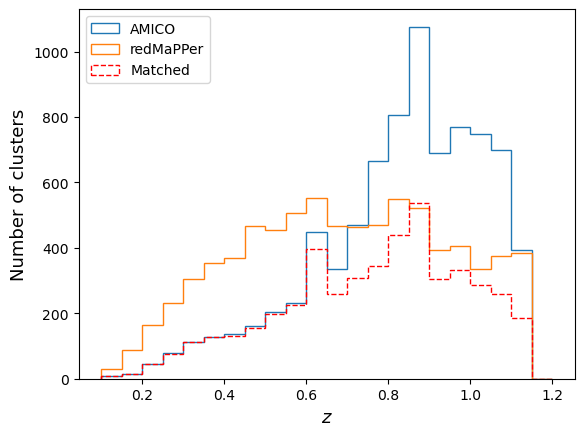

In [20]:
plt.hist(c1['z'],bins = bins, histtype = 'step', label = 'AMICO')
plt.hist(c2['z'],bins = bins, histtype = 'step', label = 'redMaPPer')
#plt.hist(c1_znm, bins = bins, label = 'AMICO not matched', histtype = 'step', color = 'b')
#plt.hist(c2_znm, bins = bins, label = 'RedMapper not matched', histtype = 'step', color = 'green')
plt.hist(c_merged_12['cat1_z'], bins = bins, label = 'Matched',linestyle = 'dashed', histtype = 'step', color = 'r')
#plt.hist(c_merged_12['cazt2_z'], bins = 25, label = 'RedMapper matched',linestyle = 'dashed', histtype = 'step')
plt.legend(loc = 'upper left')
plt.ylabel('Number of clusters', fontsize = 13)
plt.xlabel('$z$', fontsize = 13)
plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/zdistrib_match.png', format='png', transparent=True)
plt.show()